In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
#多的输出，是使用hidden2作为一个输入
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])
        

model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           930         dense_4[0][0]                    
____________________________________________________________________________________________

In [8]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

#因为有多个output，所以需要有多个y
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.5023 - dense_6_loss: 0.6104 - dense_7_loss: 0.8919 - val_loss: 1.1541 - val_dense_6_loss: 0.4939 - val_dense_7_loss: 0.6602
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.0987 - dense_6_loss: 0.4620 - dense_7_loss: 0.6367 - val_loss: 1.0366 - val_dense_6_loss: 0.4503 - val_dense_7_loss: 0.5863
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.9749 - dense_6_loss: 0.4279 - dense_7_loss: 0.5470 - val_loss: 0.9750 - val_dense_6_loss: 0.4229 - val_dense_7_loss: 0.5521
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9143 - dense_6_loss: 0.3997 - dense_7_loss: 0.5146 - val_loss: 1.0449 - val_dense_6_loss: 0.4571 - val_dense_7_loss: 0.5878
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8666 - dense_6_loss: 0.3822 - dense_7_loss: 0.4845 - val_loss: 0.8942 - val_dense_6_loss: 0.3978 - val_dense_7_loss: 0.4964


In [10]:
print(history.history)

{'loss': [1.5023095607757568, 1.0987298488616943, 0.9748797416687012, 0.9142955541610718, 0.8666458129882812, 0.8416069746017456, 0.8168110251426697, 0.8002203106880188, 0.7856299877166748, 0.7776992321014404], 'dense_6_loss': [0.6104242205619812, 0.4620188772678375, 0.42788031697273254, 0.3997413218021393, 0.38217222690582275, 0.376253217458725, 0.3676718771457672, 0.3612675666809082, 0.35728970170021057, 0.35666534304618835], 'dense_7_loss': [0.8918858766555786, 0.6367111206054688, 0.5469998121261597, 0.514553964138031, 0.484473317861557, 0.46535393595695496, 0.4491393566131592, 0.4389524757862091, 0.42834004759788513, 0.42103344202041626], 'val_loss': [1.1541011333465576, 1.036569595336914, 0.974967896938324, 1.0448815822601318, 0.8941922783851624, 0.8463829755783081, 0.8396812081336975, 0.8243100643157959, 0.7887727618217468, 0.7806617021560669], 'val_dense_6_loss': [0.49387118220329285, 0.45027393102645874, 0.42286214232444763, 0.4570770561695099, 0.39780595898628235, 0.3854094147

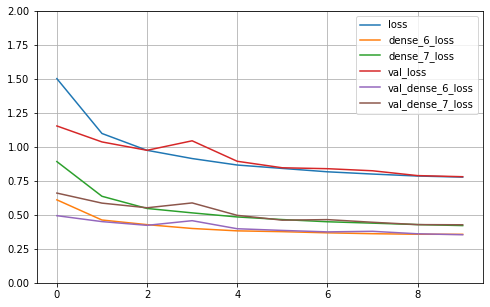

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)

In [11]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],
               [y_test, y_test], verbose=0)

[0.774289608001709, 0.3614042401313782, 0.412885457277298]